In [13]:
!pwd
%cd /content/EVA5

/content/EVA5/S7
/content/EVA5


In [14]:
#!git clone https://github.com/vigneshbabupj/EVA5.git
!git pull

Already up to date.


In [15]:
%cd /content/EVA5/S7

/content/EVA5/S7


In [16]:
!ls

eva_data_loader.py  eva_regularization.py  eva_train.py  __pycache__
eva_model.py	    eva_test.py		   eva_utils.py  readme.md


In [17]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
import torch.optim as optim

In [18]:
# from google.colab import drive
# drive.mount("mnt")
# %cd "mnt/My Drive/Colab Notebooks"

In [19]:
#import Different modules
from eva_model import Assign_7_Cifar10_model
from eva_data_loader import CIFAR10_dataloader
from eva_train import train
from eva_test import test
from  eva_utils import incorrect_images
import eva_regularization as rg

In [20]:
# CUDA for PyTorch
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
torch.backends.cudnn.benchmark = True

seed=121

torch.manual_seed(seed)

print("Using Cuda : ", use_cuda)


Using Cuda :  True


In [21]:
Batch_Size = 128

train_loader,test_loader, classes = CIFAR10_dataloader(Batch_Size, use_cuda)

Files already downloaded and verified
Files already downloaded and verified


In [22]:
from torchsummary import summary

model = Assign_7_Cifar10_model().to(device)

summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
            Conv2d-4           [-1, 64, 32, 32]          18,432
              ReLU-5           [-1, 64, 32, 32]               0
       BatchNorm2d-6           [-1, 64, 32, 32]             128
         MaxPool2d-7           [-1, 64, 16, 16]               0
            Conv2d-8           [-1, 32, 18, 18]           2,048
              ReLU-9           [-1, 32, 18, 18]               0
      BatchNorm2d-10           [-1, 32, 18, 18]              64
           Conv2d-11           [-1, 32, 18, 18]             288
             ReLU-12           [-1, 32, 18, 18]               0
      BatchNorm2d-13           [-1, 32, 18, 18]              64
           Conv2d-14           [-1, 64,

In [23]:
model = Assign_7_Cifar10_model().to(device)

lambda_l1 = 0
lambda_l2 = 0

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=lambda_l2)
#scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.01)

train_losses = []
test_losses = []
train_accuracy = []
test_accuracy = []

EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train_acc, train_loss = train(model, device, train_loader, optimizer, lambda_l1,criterion)
    train_losses.append(train_loss)
    train_accuracy.append(train_acc)

    #scheduler.step()
    test_acc, test_loss = test(model, device, test_loader, criterion)
    test_losses.append(test_loss)
    test_accuracy.append(test_acc)

#model_file = 'models/'+versions+'.pth'
#torch.save(model.state_dict(), model_file)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 0


Train: Batch id: 390 	Loss: 0.928482	 Accuracy:52.602: 100%|██████████| 391/391 [00:22<00:00, 17.34it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.008094, Accuracy: 6326/10000 (63.260%)

EPOCH: 1


Train: Batch id: 390 	Loss: 0.902941	 Accuracy:69.308: 100%|██████████| 391/391 [00:22<00:00, 17.40it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.006490, Accuracy: 7149/10000 (71.490%)

EPOCH: 2


Train: Batch id: 390 	Loss: 0.714083	 Accuracy:75.798: 100%|██████████| 391/391 [00:22<00:00, 17.19it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.005373, Accuracy: 7647/10000 (76.470%)

EPOCH: 3


Train: Batch id: 390 	Loss: 0.495078	 Accuracy:79.748: 100%|██████████| 391/391 [00:22<00:00, 17.24it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.005091, Accuracy: 7779/10000 (77.790%)

EPOCH: 4


Train: Batch id: 390 	Loss: 0.594136	 Accuracy:82.326: 100%|██████████| 391/391 [00:22<00:00, 17.15it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.005093, Accuracy: 7802/10000 (78.020%)

EPOCH: 5


Train: Batch id: 390 	Loss: 0.709575	 Accuracy:84.378: 100%|██████████| 391/391 [00:22<00:00, 17.22it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004799, Accuracy: 7896/10000 (78.960%)

EPOCH: 6


Train: Batch id: 390 	Loss: 0.515782	 Accuracy:85.956: 100%|██████████| 391/391 [00:22<00:00, 17.34it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004603, Accuracy: 8080/10000 (80.800%)

EPOCH: 7


Train: Batch id: 390 	Loss: 0.331583	 Accuracy:87.136: 100%|██████████| 391/391 [00:22<00:00, 17.28it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004141, Accuracy: 8188/10000 (81.880%)

EPOCH: 8


Train: Batch id: 390 	Loss: 0.558886	 Accuracy:88.378: 100%|██████████| 391/391 [00:22<00:00, 17.32it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004158, Accuracy: 8237/10000 (82.370%)

EPOCH: 9


Train: Batch id: 390 	Loss: 0.230985	 Accuracy:89.484: 100%|██████████| 391/391 [00:22<00:00, 17.20it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004125, Accuracy: 8306/10000 (83.060%)

EPOCH: 10


Train: Batch id: 390 	Loss: 0.569369	 Accuracy:90.346: 100%|██████████| 391/391 [00:22<00:00, 17.26it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004078, Accuracy: 8320/10000 (83.200%)

EPOCH: 11


Train: Batch id: 390 	Loss: 0.363332	 Accuracy:91.260: 100%|██████████| 391/391 [00:22<00:00, 17.30it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004204, Accuracy: 8310/10000 (83.100%)

EPOCH: 12


Train: Batch id: 390 	Loss: 0.351762	 Accuracy:92.050: 100%|██████████| 391/391 [00:22<00:00, 17.19it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004203, Accuracy: 8315/10000 (83.150%)

EPOCH: 13


Train: Batch id: 390 	Loss: 0.199728	 Accuracy:92.608: 100%|██████████| 391/391 [00:22<00:00, 17.29it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004312, Accuracy: 8330/10000 (83.300%)

EPOCH: 14


Train: Batch id: 390 	Loss: 0.143393	 Accuracy:93.256: 100%|██████████| 391/391 [00:22<00:00, 17.16it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004408, Accuracy: 8289/10000 (82.890%)

EPOCH: 15


Train: Batch id: 390 	Loss: 0.281792	 Accuracy:93.898: 100%|██████████| 391/391 [00:22<00:00, 17.21it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004585, Accuracy: 8292/10000 (82.920%)

EPOCH: 16


Train: Batch id: 390 	Loss: 0.265747	 Accuracy:94.178: 100%|██████████| 391/391 [00:22<00:00, 17.19it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004373, Accuracy: 8380/10000 (83.800%)

EPOCH: 17


Train: Batch id: 390 	Loss: 0.285987	 Accuracy:94.836: 100%|██████████| 391/391 [00:22<00:00, 17.30it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004256, Accuracy: 8383/10000 (83.830%)

EPOCH: 18


Train: Batch id: 390 	Loss: 0.210777	 Accuracy:95.262: 100%|██████████| 391/391 [00:22<00:00, 17.32it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004906, Accuracy: 8236/10000 (82.360%)

EPOCH: 19


Train: Batch id: 390 	Loss: 0.158640	 Accuracy:95.592: 100%|██████████| 391/391 [00:22<00:00, 17.15it/s]



Test set: loss: 0.004579, Accuracy: 8355/10000 (83.550%)



/content/EVA5/S7/eva_utils.py:55: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  idxs_mask = (pred.eq(target.data.view_as(pred))==False).nonzero() ## store incorrect images
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


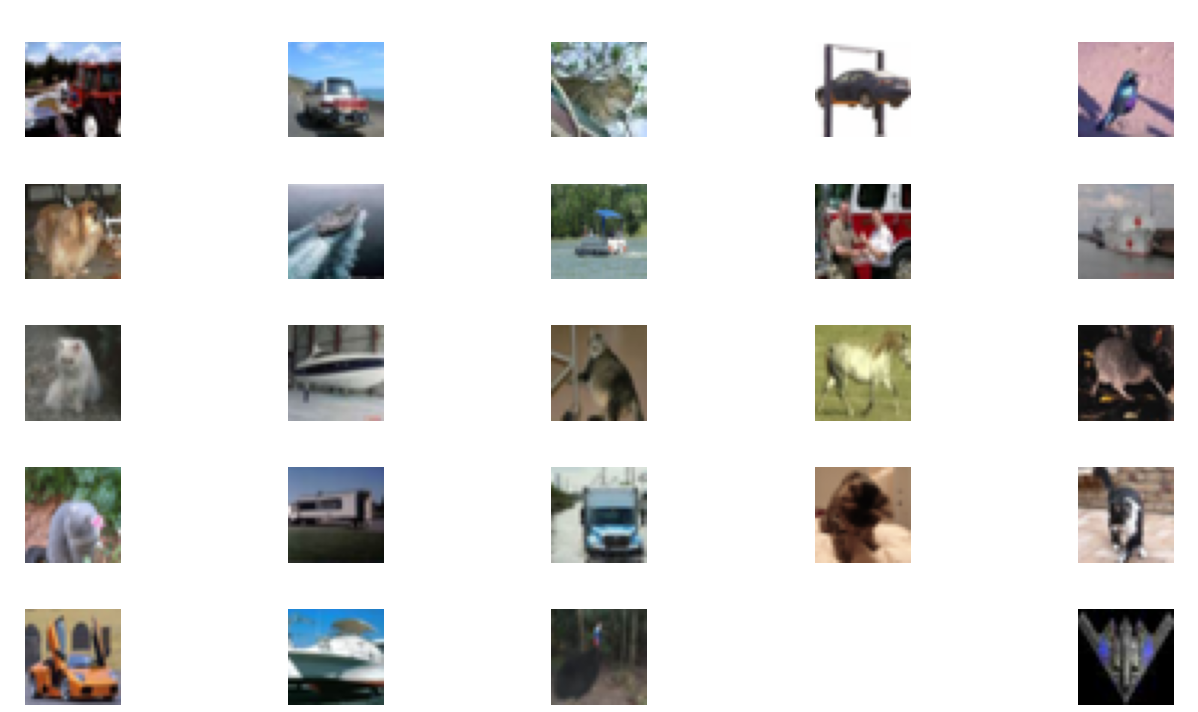

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

incorrect = incorrect_images(model, device, test_loader)
incorrect_examples = incorrect['images']
incorrect_pred = incorrect['Pred']
incorrect_target = incorrect['target']

inv_normalize = transforms.Normalize(
  mean=[-0.4890062/0.264582, -0.47970363/0.258996, -0.47680542/0.25643882],
  std=[1/0.264582, 1/0.258996, 1/0.25643882]
)


fig = plt.figure(figsize=(20,10))

for i in range(25):
  plt.subplot(5,5,i+1)
  #plt.tight_layout(pad=0, w_pad=0, h_pad=0.4)
  #incorrect_examples_inv = inv_normalize(incorrect_examples[i])
  

  incorrect_examples_temp = inv_normalize(incorrect_examples[i])
  incorrect_examples_temp = incorrect_examples_temp.cpu().numpy()

  plt.imshow(np.transpose(incorrect_examples_temp, (1, 2, 0)).squeeze())
  plt.title(f"Predicted:{classes[incorrect_pred[i]]} \n Target:{classes[incorrect_target[i]]}",color='white',fontsize=16)
  plt.axis('off')
  plt.tight_layout() 
  

#plt.savefig('/content/drive/My Drive/models/incorrect_images.jpg', dpi=300, bbox_inches='tight')
plt.show()